<a href="https://colab.research.google.com/github/Viktoriia-Osmanova/main-repo/blob/main/Python_DS_HW2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Первинне дослідження даних

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import pandas as pd

# Використання відносного шляху до файлу
file_path = '/content/drive/My Drive/Colab Notebooks/bestsellers with categories.csv'

import pandas as pd

# Зчитуємо CSV-файл
df = pd.read_csv(file_path)



# Виводимо розмір датасету
print("Розмір датасету:", df.shape)

df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# Виводимо перші п'ять рядків
print("Перші п'ять рядків датасету:")
print(df.head())



Mounted at /content/drive
Розмір датасету: (550, 7)
Перші п'ять рядків датасету:
                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [2]:
# Виведення кількості пропусків у кожному стовпці
missing_values = df.isna().sum()
print("Кількість пропусків у кожному стовпці:")
print(missing_values)

Кількість пропусків у кожному стовпці:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [3]:

# Перевірка наявності пропусків у якихось змінних
any_missing = any(missing_values > 0)
print("Чи є в якихось змінних пропуски? Відповідь:", "Так" if any_missing else "Ні")

Чи є в якихось змінних пропуски? Відповідь: Ні


In [4]:
# Виведення унікальних значень у колонці "genre"
unique_genres = df['genre'].unique()
print("Унікальні жанри:", unique_genres)

Унікальні жанри: ['Non Fiction' 'Fiction']


<Axes: title={'center': 'Розподіл цін'}, ylabel='Frequency'>

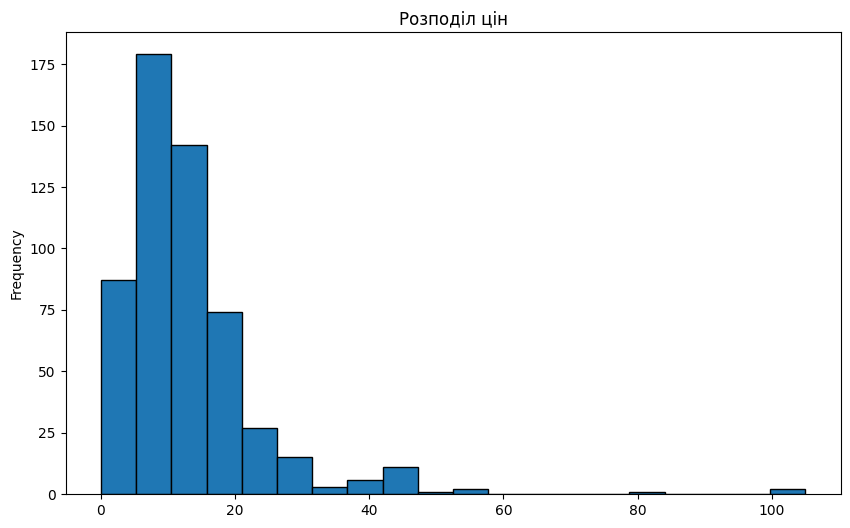

In [5]:
# Побудова гістограми розподілу цін
df['price'].plot(kind='hist', bins=20, edgecolor='black', figsize=(10, 6), title='Розподіл цін')


In [6]:
# Визначення максимальної, мінімальної, середньої та медіанної цін
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()
moda = df['price'].mode()

print("Максимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)
print("Мода:", median_price)


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0
Мода: 11.0


#Пошук та сортування даних

In [7]:
# Знайдемо найвищий рейтинг та кількість книг з таким рейтингом
max_rating = df['user_rating'].max()
books_with_max_rating = df[df['user_rating'] == max_rating].shape[0]

# Знайдемо книгу з найбільшою кількістю відгуків
most_reviewed_book = df.loc[df['reviews'].idxmax(), 'name']

# Знайдемо найдорожчу книгу серед тих, що потрапили до Топ-50 у 2015 році
max_price_2015 = df[(df['year'] == 2015)]['price'].max()
most_expensive_book_2015 = df[(df['year'] == 2015) & (df['price'] == max_price_2015)]['name'].iloc[0]

# Порахуємо кількість книг жанру Fiction, які потрапили до Топ-50 у 2010 році
fiction_books_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]

# Порахуємо кількість книг з рейтингом 4.9, які потрапили до рейтингу у 2010 та 2011 роках
books_with_4_9_rating = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]

# Відсортуємо книги, які потрапили до рейтингу в 2015 році і коштують менше 8 доларів
sorted_books_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')

# Знайдемо останню книгу у відсортованому списку
last_book_in_sorted_list = sorted_books_2015_under_8.iloc[-1]['name']

print("Найвищий рейтинг у датасеті:", max_rating)
print("Кількість книг з найвищим рейтингом:", books_with_max_rating)
print("Книга з найбільшою кількістю відгуків:", most_reviewed_book)
print("Найдорожча книга серед тих, що потрапили до Топ-50 у 2015 році:", most_expensive_book_2015)
print("Кількість книг жанру Fiction, що потрапили до Топ-50 у 2010 році:", fiction_books_2010)
print("Кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках:", books_with_4_9_rating)
print("Назва останньої книги у відсортованому списку:", last_book_in_sorted_list)


Найвищий рейтинг у датасеті: 4.9
Кількість книг з найвищим рейтингом: 52
Книга з найбільшою кількістю відгуків: Where the Crawdads Sing
Найдорожча книга серед тих, що потрапили до Топ-50 у 2015 році: Publication Manual of the American Psychological Association, 6th Edition
Кількість книг жанру Fiction, що потрапили до Топ-50 у 2010 році: 20
Кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках: 1
Назва останньої книги у відсортованому списку: Old School (Diary of a Wimpy Kid #10)


#Агрегування даних та з'єднання таблиць

In [8]:
#Максимальна та мінімальна ціни для кожного з жанрів:

max_prices = df.groupby('genre')['price'].max()
min_prices = df.groupby('genre')['price'].min()

print(min_prices, max_prices)

genre
Fiction        0
Non Fiction    0
Name: price, dtype: int64 genre
Fiction         82
Non Fiction    105
Name: price, dtype: int64


In [9]:
#Розмірність таблиці кількості книг для кожного з авторів:

book_counts = df.groupby('author').size()
print(book_counts)

author
Abraham Verghese              2
Adam Gasiewski                1
Adam Mansbach                 1
Adir Levy                     1
Admiral William H. McRaven    1
                             ..
Walter Isaacson               3
William Davis                 2
William P. Young              2
Wizards RPG Team              3
Zhi Gang Sha                  2
Length: 248, dtype: int64


In [10]:
#Автор, у якого найбільше книг та кількість цих книг:

max_books_author = book_counts.idxmax()
max_books_count = book_counts.max()

print(max_books_author, max_books_count)

Jeff Kinney 12


In [11]:
#Другий датафрейм з середнім рейтингом для кожного автора:


mean_ratings = df.groupby('author')['user_rating'].mean()

In [12]:
#Автор з найнижчим середнім рейтингом та його значення:

min_mean_rating_author = mean_ratings.idxmin()
min_mean_rating_value = mean_ratings.min()


In [13]:
#З'єднання двох датафреймів:

merged_df = pd.concat([book_counts, mean_ratings], axis=1)
merged_df.columns = ['book_count', 'mean_rating']

In [14]:
#Сортування датафрейму за кількістю книг та середнім рейтингом:

sorted_df = merged_df.sort_values(by=['book_count', 'mean_rating'])


#Візуалізація

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


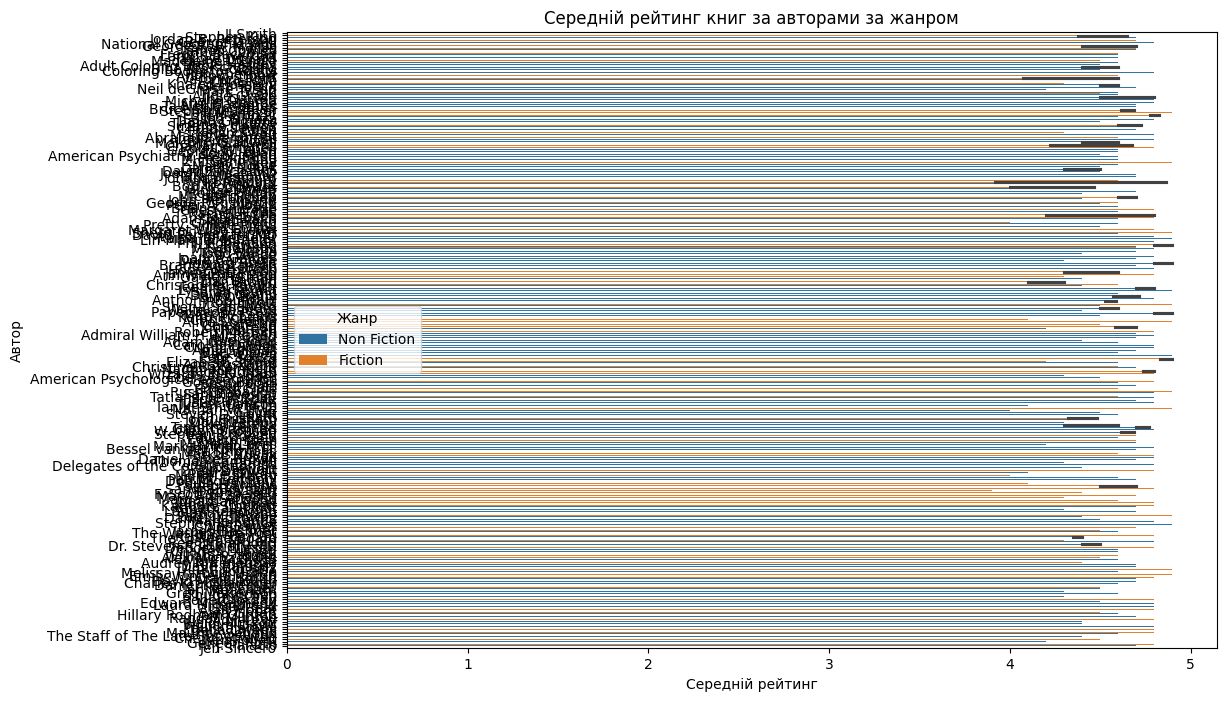

In [15]:
#Графік розподілу цін на книги для кожного жанру:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12, 8))
sns.barplot(x='user_rating', y='author', hue='genre', data=df, estimator=np.mean)
plt.title('Середній рейтинг книг за авторами за жанром')
plt.xlabel('Середній рейтинг')
plt.ylabel('Автор')
plt.legend(title='Жанр')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


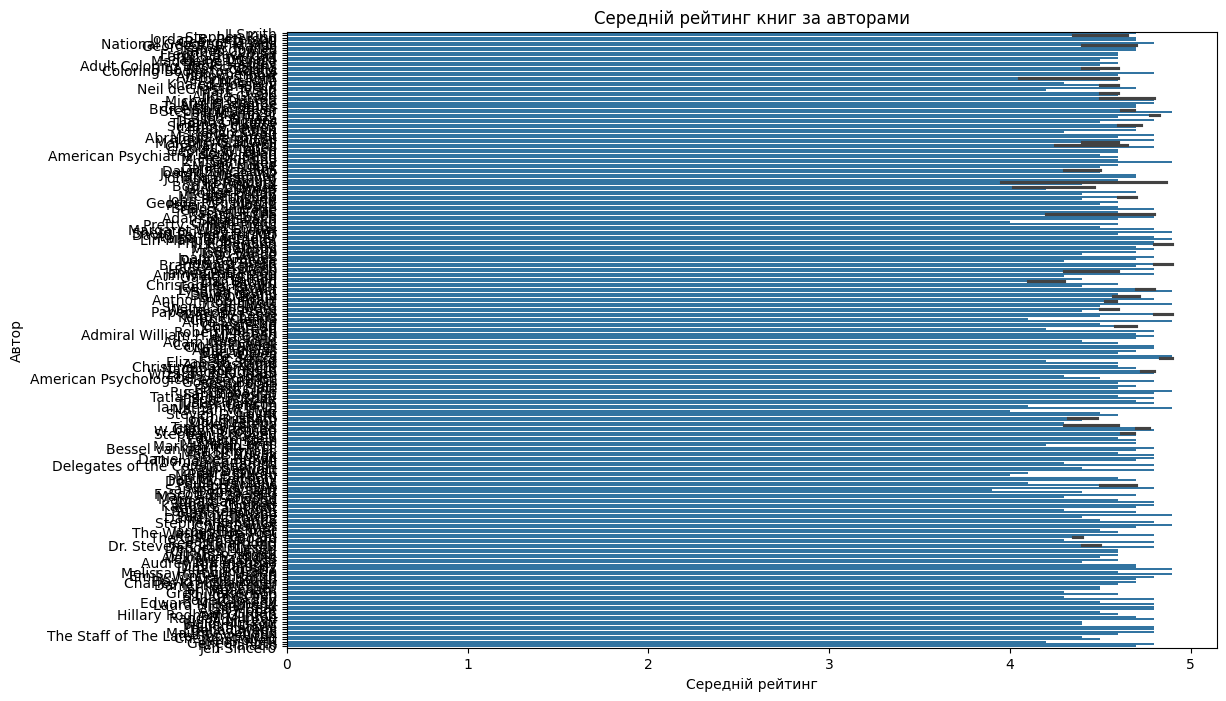

In [16]:
#Графік рейтингу книг для кожного автора
plt.figure(figsize=(12, 8))
sns.barplot(x='user_rating', y='author', data=df, estimator=np.mean)
plt.title('Середній рейтинг книг за авторами')
plt.xlabel('Середній рейтинг')
plt.ylabel('Автор')
plt.show()


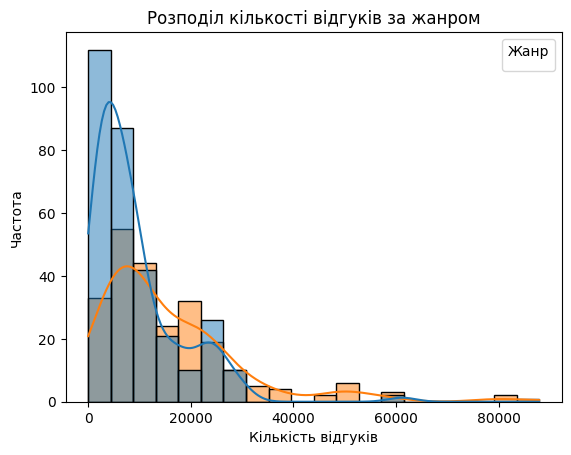

In [17]:
#Розподіл кількості відгуків для кожного жанруplt.figure(figsize=(10, 6))
sns.histplot(df, x='reviews', hue='genre', bins=20, kde=True)
plt.title('Розподіл кількості відгуків за жанром')
plt.xlabel('Кількість відгуків')
plt.ylabel('Частота')
plt.legend(title='Жанр')
plt.show()
